<a href="https://colab.research.google.com/github/denisa-cernatoiu/cv1_lab/blob/main/cv1_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MASTER PLAN
# importam datele - done
# verificarea integritatii datelor - dones
# impartirea datelor in train/test(/valid) - done
# preprocesarea datelor - X
#       * normalizare si augmentare - X
#       * analiza datelor - done
#       * resize - done
#       * segemntarea mainii - X
#       * hand extraction - X
# Feature extraction - X
# Clasificare - X
# PR curve / Matricea de confuzie - X

**Matrice de confuzie pt un clasificator binar**

|       |     1   |  0
|-------|---------|--------
|pred T |  100%   |  0
|       |         |
|pred N |    0    |  100%



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
bp = "/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images"

file_path_arr = []
for i in range(4):
  file_path_arr.append(glob(bp+'/'+str(i)+"/*.jpg"))
print(len(file_path_arr))
print(file_path_arr)
print(np.shape(file_path_arr))

4
[['/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/6.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/7.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/2.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/5.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/3.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/4.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/1.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/8.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/9.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/0/0.jpg'], ['/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/1/5.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/1/7.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/1/8.jpg', '/content/drive/MyDrive/Images-20251020T165527Z-1-001/Images/1/3.jpg', 

In [5]:
random.seed(42) # setam seed pt a avea toti aceleasi date

In [6]:
image_index_arr = random.sample(range(0,9), 7)
print(image_index_arr)

[1, 0, 5, 2, 8, 4, 7]


In [7]:
train_image_path = []
test_image_path = []

for hand_class in file_path_arr:
  # var temporare pt mentinerea claselor
  tmp_train = []
  tmp_test = []
  for i in range(10):
    if i not in image_index_arr:
      tmp_test.append(hand_class[i])
    else:
      tmp_train.append(hand_class[i])
  train_image_path.append(tmp_train)
  test_image_path.append(tmp_test)

print(np.shape(train_image_path))
print(np.shape(test_image_path))

(4, 7)
(4, 3)


In [8]:
# array temporare
train_images = []
test_images = []

for cls in train_image_path:
  t = []
  for i in cls:
    t.append(cv2.imread(i))
  train_images.append(t)

for cls in test_image_path:
  t = []
  for i in cls:
    t.append(cv2.imread(i))
  test_images.append(t)


print(np.shape(train_images))
print(np.shape(test_images))
# clase dimensiune canale

(4, 7, 4032, 1908, 3)
(4, 3, 4032, 1908, 3)


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7873358b6000>)

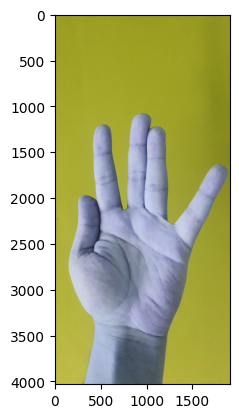

In [9]:
plt.figure(), plt.imshow(train_images[0][0])

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x78733542fec0>)

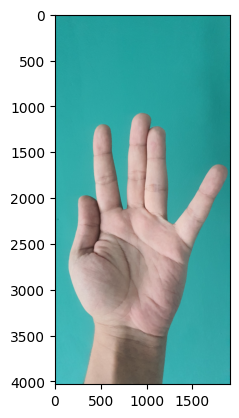

In [10]:
im = train_images[0][0]
img_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure(), plt.imshow(img_rgb)

In [11]:
print(np.shape(img_rgb))

(4032, 1908, 3)


In [12]:
# resize all
# convert to correct color space

def resize_and_convert(image, scale_factor = 10):
  w, h, x = np.shape(image)
  im_resised = cv2.resize(image, (int(h/scale_factor), int(w/scale_factor)))
  im_rgb = cv2.cvtColor(im_resised, cv2.COLOR_BGR2RGB)
  return im_rgb

In [13]:
for i, cls in enumerate(train_images):
  for j, im in enumerate(cls):
    train_images[i][j] = resize_and_convert(im)

for i, cls in enumerate(test_images):
  for j, im in enumerate(cls):
    test_images[i][j] = resize_and_convert(im)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x78730a217890>)

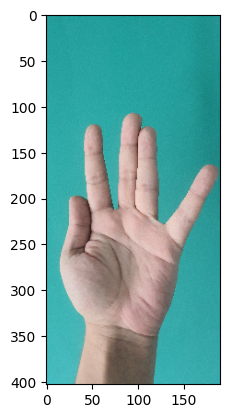

In [14]:
plt.figure(), plt.imshow(train_images[0][0])

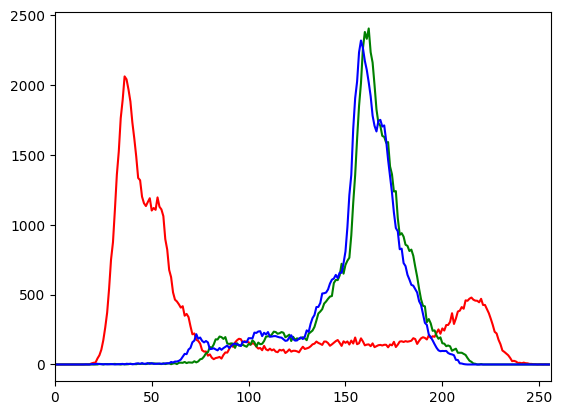

In [15]:
img = train_images[0][0]
rgb = ['r','g','b']

for i, color in enumerate(rgb):
  hist = cv2.calcHist([img], [i], None, [256], [0,256])
  plt.plot(hist, color=color)
  plt.xlim([0,256])

plt.show()

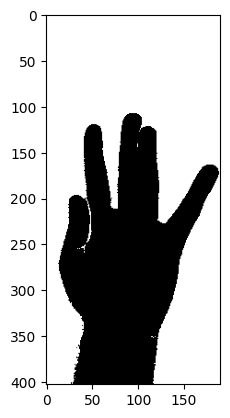

In [19]:
# hand extraction (pt rosu extragem de pe canalul 2 pt ca in spate imaginile sunt to bgr)
# dar se extrage mult mai usor background ul (canal 0)
red = img[:,:, 0].copy()
red[red > 80] = 0
red[red > 0] = 255
plt.imshow(red, cmap='gray')

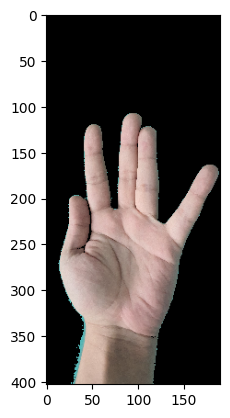

In [21]:
im = img.copy()
im[red == 255] = [0, 0, 0]
plt.imshow(im)

In [23]:
def binarizare(img):
    R = img[:, :, 0]
    G = img[: ,:, 1]
    B = img[:, :, 2]
    C1 = np.zeros((img.shape[0], img.shape[1]))
    C2 = np.zeros((img.shape[0], img.shape[1]))
    C3 = np.zeros((img.shape[0], img.shape[1]))
    C4 = np.zeros((img.shape[0], img.shape[1]))
    C5 = np.zeros((img.shape[0], img.shape[1]))
    C6 = np.zeros((img.shape[0], img.shape[1]))
    C7 = np.zeros((img.shape[0], img.shape[1]))
    rez = np.zeros((img.shape[0], img.shape[1]))
    C1[np.logical_and(R > 95, G > 40, B > 20)] = 1
    C2[(np.maximum(np.maximum(R, G), B) - np.minimum(np.minimum(R, G), B)) > 15] = 1
    C3[np.absolute(R - G) > 15] = 1
    C4[np.logical_and(R > G, R > B)] = 1
    C5[np.logical_and(R > 220, G > 210, B > 170)] = 1
    C6[np.absolute(R - G) <= 15] = 1
    C7[np.logical_and(R > B, G > B)] = 1

    caz1 = np.logical_and(np.logical_and(C1 == 1, C2 == 1, C3 == 1), C4 == 1)
    caz2 = np.logical_and(C5 ==1, C6 == 1, C7 == 1)
    rez[np.logical_or(caz1 == 1, caz2 == 1)] = 1
    return rez

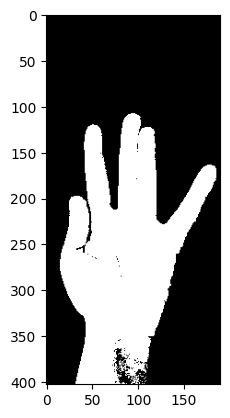

In [26]:
bin = binarizare(img)
plt.imshow(bin, cmap = 'gray')

In [42]:
train_images_bin = []
test_images_bin = []

for cls in train_images:
  t = []
  for i in cls:
    t.append(binarizare(i))
  train_images_bin.append(t)

for cls in test_images:
  t = []
  for i in cls:
    t.append(binarizare(i))
  test_images_bin.append(t)

In [43]:
def background(img):
  red = img[:,:, 0]
  red[red > 80] = 0
  red[red > 0] = 255
  im[red == 255] = [0, 0, 0]
  return img

In [45]:
train_images_back = []
test_images_back = []

for cls in train_images:
  t = []
  for i in cls:
    t.append(background(i))
  train_images_back.append(t)

for cls in test_images:
  t = []
  for i in cls:
    t.append(background(i))
  test_images_back.append(t)

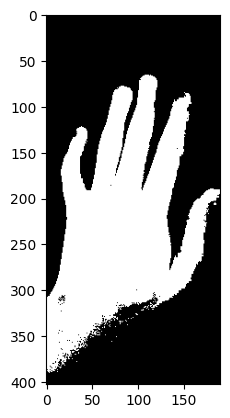

In [48]:
for cls in train_images_bin:
  for i in cls:
    plt.imshow(i, cmap='gray')

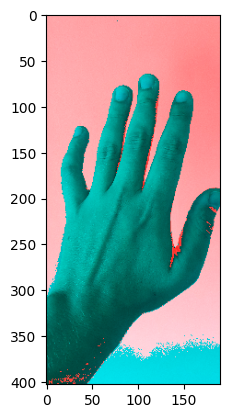

In [47]:
for cls in train_images_back:
  for i in cls:
    plt.imshow(i)

15


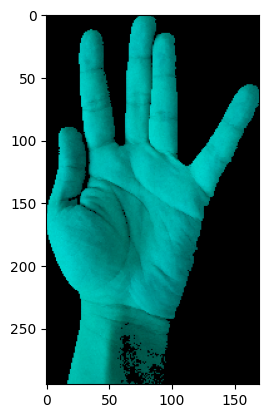

In [56]:
def find_contours(img):
  contours, hierarchy = cv2.findContours(img.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  print(len(contours))
  # nu folosim cu max pentru ca ne trebuie cel cu cea mai mare arie
  max = -1
  idx = -1
  maxRect = np.array([0,0,0,0])
  for i,c in enumerate(contours):
    bbox = cv2.boundingRect(c)
    arie = bbox[2] * bbox[3]
    if arie > max :
      max = arie
      maxRect = bbox
      idx = i
  return maxRect


def crop_image(img, img_bw):
  maxRect = find_contours(img_bw)
  crop_bw = img_bw[maxRect[1] : maxRect[1] + maxRect[3], maxRect[0]:maxRect[0] + maxRect[2]]
  crop = img[maxRect[1] : maxRect[1] + maxRect[3], maxRect[0]:maxRect[0] + maxRect[2]]
  crop[crop_bw == 0] = [0 , 0, 0]
  return crop

im1 = crop_image(train_images[0][0], train_images_bin[0][0])
plt.imshow(im1)